In [1]:
# Clone the 'Hello World' exmaple into a temporary directory.
from flowserv.tests.workflow import clone_helloworld

workflowdir = clone_helloworld()

In [2]:
# List of names for random input generation.

NAMES = [
    'Alice', 'Bob', 'Claire', 'Dave', 'Elizabeth-Anne', 'Francisco', 'Georgia', 'Howard', 'Isabella', 'Jacob',
    'Kristina', 'Luke', 'Michelle', 'Norman', 'Olivia', 'Patrick', 'Qiana', 'Rafael', 'Sandy', 'Tom', 'Ursula',
    'Victor', 'Whitney', 'Xiong', 'Yvette', 'Zack'
]

# List of greeting phrases for different workflow runs
GREETINGS = ['Hi', 'Hello', 'Hey', 'Welcome', 'Hola', 'Salut', 'Alo', 'Ciao']

In [3]:
# Run workflow for each greeting phrase with a random selection of 10 names.
import os
import random
import shutil

from flowserv.tests.workflow import run_workflow, INPUTFILE

runsdir = os.path.abspath('runs')
if os.path.exists(runsdir):
    shutil.rmtree(runsdir)
os.makedirs(runsdir)

runs = list()
for i, greeting in enumerate(GREETINGS):
    names = set()
    while len(names) < 10:
        names.add(random.choice(NAMES))
    namesfile = os.path.join(runsdir, 'names{}.txt'.format(i))
    with open(namesfile, 'w') as f:
        for name in names:
            f.write('{}\n'.format(name))
    rundir = os.path.join(runsdir, 'helloworld{}'.format(i))
    args = dict({'greeting': greeting, 'sleeptime': 0, 'names': INPUTFILE(namesfile)})
    state = run_workflow(workflowdir, arguments=args, rundir=rundir)
    assert state.is_success()
    runs.append(rundir)

In [4]:
from flowserv.tests.workflow import run_postproc_workflow

# Create separate folder for post-processing workflow. Delete folder
# if it still exists from a previous run.
postprocdir = os.path.abspath('postproc')
if os.path.exists(postprocdir):
    shutil.rmtree(postprocdir)

state = run_postproc_workflow(workflowdir, runs, rundir=postprocdir)

if state.is_error():
    for msg in state.messages:
        print(msg)

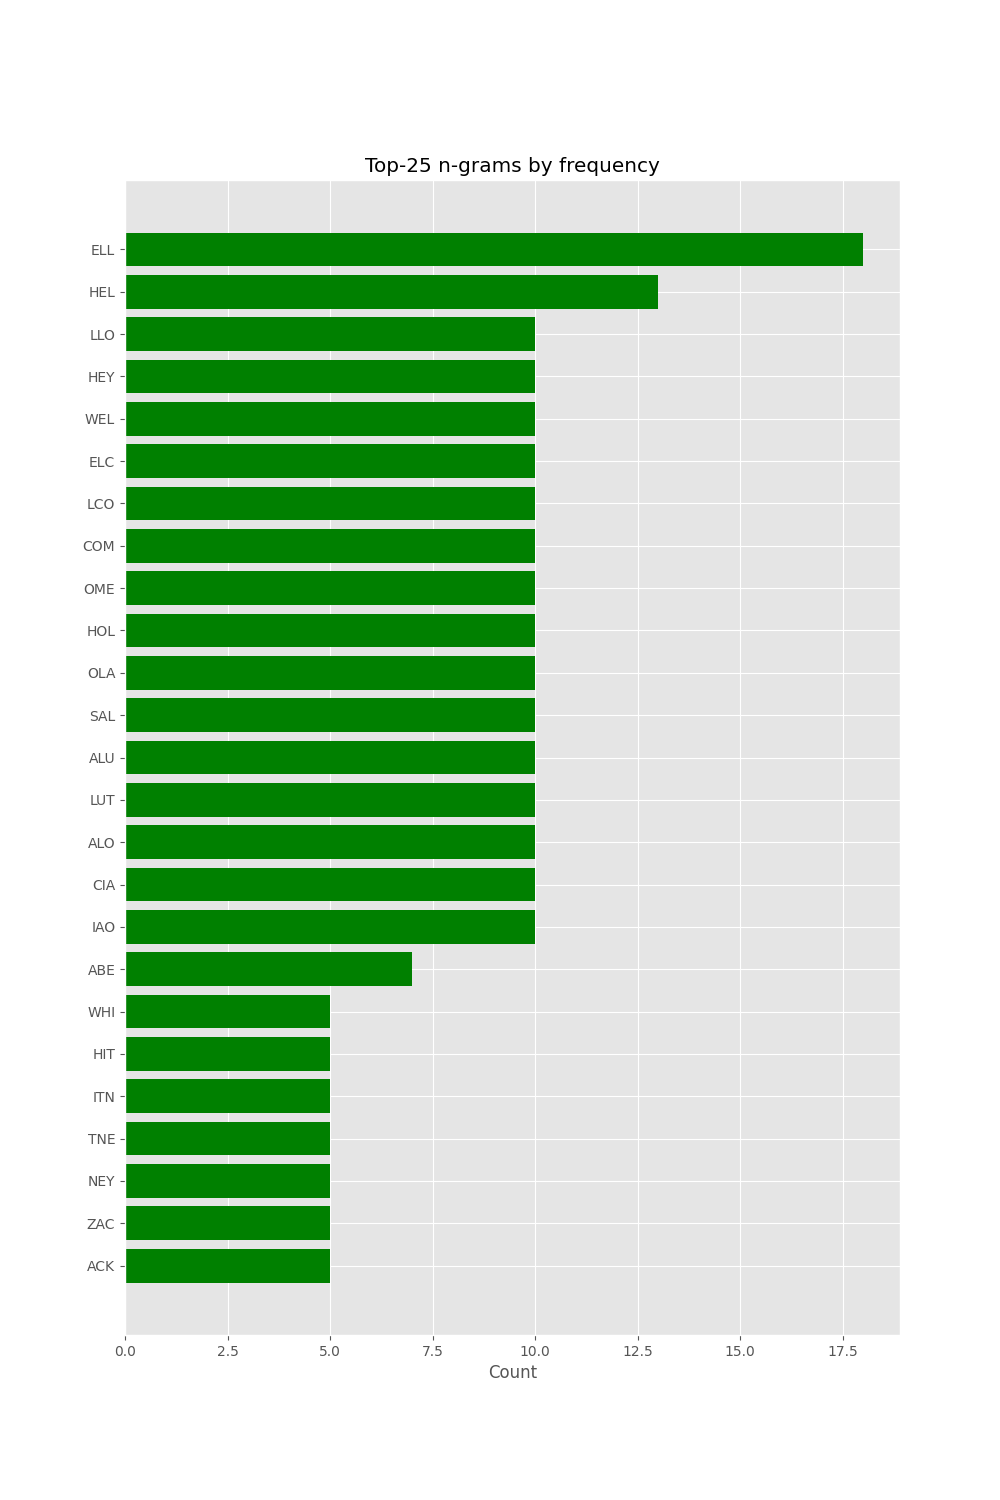

In [5]:
from IPython.display import Image
Image(os.path.join(postprocdir, 'results/ngrams.png'))

In [6]:
# Remove all generated files
shutil.rmtree(workflowdir)
shutil.rmtree(runsdir)
shutil.rmtree(postprocdir)
